In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time

In [2]:
df = pd.read_csv('../data/clean_data/clean_data.csv')

df.head()

,duration_ms,loudness,tempo,valence,acousticness,danceability,energy
0,0.403695,0.451467,0.178779,0.963,0.732,0.819,0.341
1,0.483304,0.557378,0.412301,0.165,0.967,0.275,0.309
2,0.366304,0.530943,0.421576,0.253,0.957,0.418,0.193
3,0.983312,0.449265,0.529827,0.196,0.579,0.697,0.346
4,0.346890,0.514234,0.210284,0.406,0.996,0.518,0.203


# KMeans algo

In [4]:
from sklearn.cluster import KMeans

In [5]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(k)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

len(inertias)

10

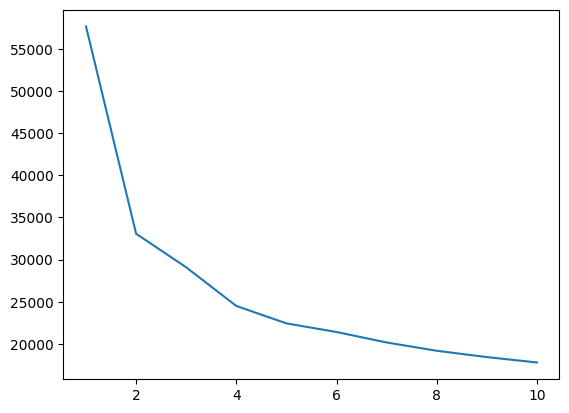

In [6]:
sns.lineplot(x=list(range(1, 11)), y=inertias);

<font color='red'>The optimal number of clusters appears to be 4</font>

## Loop for best KMeans solution

### K-means++ initialization

In [7]:
best_solution = None
time_partials = []
scores = []

start_total_time = time.time()
for _ in range(1000):
    start_partial_time = time.time()
    kmeans = KMeans(4, init='k-means++')
    kmeans.fit(df)
    partial_time = time.time() - start_partial_time
    time_partials.append(partial_time)
    scores.append(kmeans.inertia_)

    if best_solution is None or kmeans.inertia_ < best_solution.inertia_:
        best_solution = kmeans

total_time = time.time() - start_total_time

In [9]:
print(f'Best inertia: {best_solution.inertia_:.2f}')
print(f'Average inertia: {np.mean(scores):.2f}')
print(f'Std inertia: {np.std(scores):.2f}')
print('-'*50)
print(f'Total time:     {total_time:.2f} seconds.')
print(f'Average time per loop:    {np.mean(time_partials):.2f} seconds.')
print(f'Std time per loop:    {np.std(time_partials):.2f} seconds.')

Best inertia: 24506.51
Average inertia: 24510.00
Std inertia: 79.74
--------------------------------------------------
Total time:     122.24 seconds.
Average time per loop:    0.12 seconds.
Std time per loop:    0.01 seconds.


In [10]:
df_kmeans_pp = df.copy()

df_kmeans_pp['labels'] = best_solution.predict(df_kmeans_pp)

In [11]:
df_kmeans_pp.labels.value_counts(normalize=True)

labels
0    0.272540
3    0.260310
1    0.242019
2    0.225131
Name: proportion, dtype: float64

In [12]:
best_solution.cluster_centers_

array([[0.50755548, 0.59065069, 0.53657501, 0.77292784, 0.17247845,
        0.66364101, 0.68812274],
       [0.48172876, 0.33989074, 0.43704343, 0.27543692, 0.86026658,
        0.41207215, 0.20652976],
       [0.56918112, 0.61022205, 0.55510359, 0.36696592, 0.12760879,
        0.51248553, 0.67647365],
       [0.40083412, 0.46605172, 0.51733251, 0.71015077, 0.78979328,
        0.60301107, 0.38503938]])

### Random initialization

In [14]:
best_solution = None
time_partials = []
scores = []

start_total_time = time.time()
for _ in range(1000):
    start_partial_time = time.time()
    kmeans = KMeans(4, init='random')
    kmeans.fit(df)
    partial_time = time.time() - start_partial_time
    time_partials.append(partial_time)
    scores.append(kmeans.inertia_)

    if best_solution is None or kmeans.inertia_ < best_solution.inertia_:
        best_solution = kmeans

total_time = time.time() - start_total_time

In [15]:
print(f'Best inertia: {best_solution.inertia_:.2f}')
print(f'Average inertia: {np.mean(scores):.2f}')
print(f'Std inertia: {np.std(scores):.2f}')
print('-'*50)
print(f'Total time:     {total_time:.2f} seconds.')
print(f'Average time per loop:    {np.mean(time_partials):.2f} seconds.')
print(f'Std time per loop:    {np.std(time_partials):.2f} seconds.')

Best inertia: 24506.49
Average inertia: 24506.65
Std inertia: 0.06
--------------------------------------------------
Total time:     149.97 seconds.
Average time per loop:    0.15 seconds.
Std time per loop:    0.02 seconds.


In [16]:
df_kmeans_random = df.copy()

df_kmeans_random['labels'] = best_solution.predict(df_kmeans_random)

In [17]:
df_kmeans_random.labels.value_counts(normalize=True)

labels
3    0.272909
0    0.260324
1    0.241917
2    0.224850
Name: proportion, dtype: float64

In [18]:
best_solution.cluster_centers_

array([[0.40118221, 0.46624003, 0.51744981, 0.70963542, 0.79012851,
        0.60273467, 0.3851394 ],
       [0.48164248, 0.33969401, 0.43693327, 0.27518656, 0.86014028,
        0.41197962, 0.20635644],
       [0.56956841, 0.61102091, 0.55582269, 0.36707454, 0.12666305,
        0.5119005 , 0.67812678],
       [0.5071575 , 0.58991378, 0.53593763, 0.77240441, 0.17306617,
        0.66401628, 0.68662776]])